In [210]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import calendar
from scipy.optimize import leastsq, curve_fit
%run mean_analysis_utils.py

In [137]:
flask_meas_path = '/net/fluo/data2/groupMembers/cchristo/flask_measurments/summit/'

In [138]:
def preprocess_flask_meas(df):
    df['datetime'] = pd.to_datetime(df[1].astype(str)+'-'+df[2].astype(str)+'-'+ df[3].astype(str))
    df = df.set_index('datetime')
    # subset in time 
    df = df.loc['2011-01-01':'2016-01-01']
    df = df[(~df[13].str.contains('N..')) & (abs(df[12]) < 1)]
    return df

In [144]:
co2_meas = pd.read_csv(flask_meas_path + 'co2_sum_surface-flask_1_ccgg_event.txt',
#                        sep= ' ',
                       delim_whitespace=True,
                       skiprows= list(range(70)), header = None)
co2_meas = preprocess_flask_meas(co2_meas)
ch4_meas = pd.read_csv(flask_meas_path + 'ch4_sum_surface-flask_1_ccgg_event.txt',
           delim_whitespace=True,
           skiprows= list(range(70)), header = None)
ch4_meas = preprocess_flask_meas(ch4_meas)
ch4_meas[11] = ch4_meas[11]/1000

In [59]:
df = co2_meas.copy()


(380.0, 410.0)

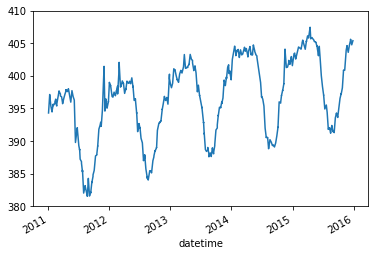

In [140]:
co2_meas[11].plot()
plt.ylim([380, 410])

In [211]:
# dt_index = pd.DatetimeIndex(xx)
dt_index = co2_meas.index
# month_ind = [(time_i.year - 2011)*12 + (time_i.month - 1) + \
#              (time_i.day/calendar.monthrange(time_i.year, time_i.month)[1]) for time_i in dt_index]
day_ind = [(time_i.year - 2011)*365 + time_i.dayofyear for time_i in dt_index]
day_ind = np.array(day_ind)
# month_ind = np.array(month_ind)
out = curve_fit(sin_func_shift_day, day_ind, \
                         co2_meas[11]) #- np.mean(co2_meas[11]))

In [205]:
# out
# dt_index[0].dayofyear
# sin_func(month_ind, out[0][0], out[0][1])
# month_ind
# plt.plot(sin_func(month_ind, out[0][0], out[0][1]))

3

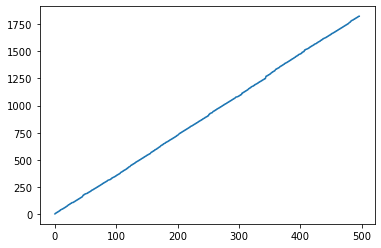

In [209]:
plt.plot(day_ind)

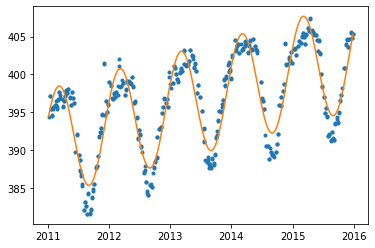

In [212]:
# plt.plot(co2_meas.index, co2_meas[11])
# plt.plot(co2_meas.index, sin_func(month_ind, out[0][0], out[0][1], out[0][2], out[0][3]))

plt.plot(co2_meas.index, co2_meas[11], '.')
# plt.plot(co2_meas.index, sin_func_shift(month_ind, *out[0]))
plt.plot(co2_meas.index, sin_func_shift_day(day_ind, *out[0]))

In [213]:
out[0]

array([ 7.15089647e+00, -6.75094546e+00,  6.31953540e-03,  3.90901497e+02])

In [169]:
# out[1]

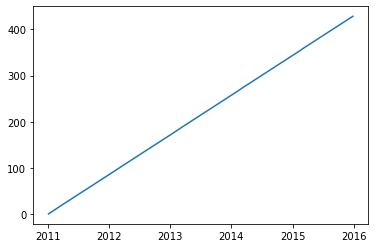

In [163]:
plt.plot(co2_meas.index, out[0][0]*month_ind)

In [153]:
out[0][-1]

0.0489332658616523

In [185]:
dt_index = ch4_meas.index
month_ind = [(time_i.year - 2011)*12 + (time_i.month - 1) + \
             (time_i.day/calendar.monthrange(time_i.year, time_i.month)[1]) for time_i in dt_index]
month_ind = np.array(month_ind)
out = curve_fit(sin_func_shift, month_ind, \
                         ch4_meas[11])
print(out[0])

[-1.55541032e-02  2.02973243e+00  7.50005571e-04  1.86731706e+00]


In [186]:
print(out[0])

[-1.55541032e-02  2.02973243e+00  7.50005571e-04  1.86731706e+00]


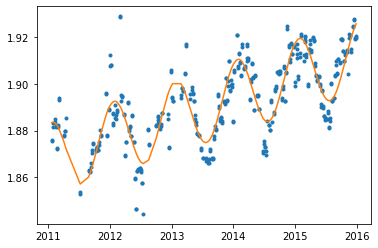

In [188]:
# ch4_meas[11].plot()
plt.plot(ch4_meas.index, ch4_meas[11], '.')
plt.plot(ch4_meas.index, sin_func_shift(month_ind, *out[0])) # out[0][0], out[0][1], out[0][2],out[0][3] ))